#  MIE 479 Capstone - Problem Definition

Lenders want to lend. Where do lenders get the money to lend you money for a house?

The goal: design a model/automated lending decision system to run a profitable lending business. 

This notebook prepares the acquisition data and the performance data for the Fannie Mae loan dataset. In the end we output three datasets. One for 2020, one for 2021 and one for 2022. We allow for at least 1 year of performance observation by including the data for 2023. 


# Fannie Mae Mortgage Lending Data

From wikipedia:

"The Federal National Mortgage Association (FNMA), commonly known as Fannie Mae, is a United States government-sponsored enterprise (GSE) and, since 1968, a publicly traded company. Founded in 1938 during the Great Depression as part of the New Deal,[2] the corporation's purpose is to expand the secondary mortgage market by securitizing mortgage loans in the form of mortgage-backed securities (MBS),[3] allowing lenders to reinvest their assets into more lending and in effect increasing the number of lenders in the mortgage market by reducing the reliance on locally based savings and loan associations (or "thrifts").[4] Its brother organization is the Federal Home Loan Mortgage Corporation (FHLMC), better known as Freddie Mac.

In 2024, with over $4.3 trillion in assets, Fannie Mae is the largest company in the United States and the fifth largest company in the world, by assets.[5][6] Fannie Mae was ranked number 27 on the Fortune 500 rankings of the largest United States corporations by total revenue and was ranked number 58 on the Fortune Global 500 rankings of the largest global corporations by total revenue.[5][6] In terms of profit, Fannie Mae is the 15th most profitable company in the United States and the 33rd most profitable in the world.[5][6]"

references:

2.  Pickert, Kate (July 14, 2008). "A Brief History of Fannie Mae and Freddie Mac". Time. Archived from the original on October 6, 2008.

3.  "About Fannie Mae". Fendral National Mortgage Association. October 7, 2008. Archived from the original on October 26, 2008. Retrieved October 28, 2008.
4.  Fabozzi, Frank J.; Modigliani, Franco (1992), Mortgage and Mortgage-backed Securities Markets, Harvard Business School Press, p. 2, ISBN 0-87584-322-0
5.  "Fortune Global 500". Fortune. Retrieved August 5, 2024.
6.  "Fortune 500". Fortune. Retrieved August 5, 2024


In [1]:
import pandas as pd
import os
import numpy as np
### Define the column names and column data types (classes)
lppub_column_names = ["POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                      "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                      "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                      "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                      "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                      "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                      "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                      "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                      "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                      "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                      "DISPOSITION_DATE", "FORECLOSURE_COSTS", "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                      "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                      "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                      "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                      "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                      "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                      "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                      "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                      "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                      "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                      "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                      "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                      "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                      "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                      "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                      "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                      "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                      "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                      "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                      "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB", 
                      "PAYMENT_DEFERRAL_MOD_EVENT_FLAG", "INTEREST_BEARING_UPB"]

# Updating column classes, converting integers to 'float' where NaN is expected
lppub_column_classes = {"POOL_ID": str, "LOAN_ID": str, "ACT_PERIOD": str, "CHANNEL": str, "SELLER": str, "SERVICER": str,
                        "MASTER_SERVICER": str, "ORIG_RATE": float, "CURR_RATE": float, "ORIG_UPB": float, "ISSUANCE_UPB": float,
                        "CURRENT_UPB": float, "ORIG_TERM": "Int64", "ORIG_DATE": str, "FIRST_PAY": str, "LOAN_AGE": "Int64",
                        "REM_MONTHS": "Int64", "ADJ_REM_MONTHS": "Int64", "MATR_DT": str, "OLTV": float, "OCLTV": float,
                        "NUM_BO": "Int64", "DTI": float, "CSCORE_B": "Int64", "CSCORE_C": "Int64", "FIRST_FLAG": str, "PURPOSE": str,
                        "PROP": str, "NO_UNITS": "Int64", "OCC_STAT": str, "STATE": str, "MSA": str, "ZIP": str, "MI_PCT": float,
                        "PRODUCT": str, "PPMT_FLG": str, "IO": str, "FIRST_PAY_IO": str, "MNTHS_TO_AMTZ_IO": "Int64",
                        "DLQ_STATUS": str, "PMT_HISTORY": str, "MOD_FLAG": str, "MI_CANCEL_FLAG": str, "Zero_Bal_Code": str,
                        "ZB_DTE": str, "LAST_UPB": float, "RPRCH_DTE": str, "CURR_SCHD_PRNCPL": float, "TOT_SCHD_PRNCPL": float,
                        "UNSCHD_PRNCPL_CURR": float, "LAST_PAID_INSTALLMENT_DATE": str, "FORECLOSURE_DATE": str,
                        "DISPOSITION_DATE": str, "FORECLOSURE_COSTS": float, "PROPERTY_PRESERVATION_AND_REPAIR_COSTS": float,
                        "ASSET_RECOVERY_COSTS": float, "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS": float,
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY": float, "NET_SALES_PROCEEDS": float,
                        "CREDIT_ENHANCEMENT_PROCEEDS": float, "REPURCHASES_MAKE_WHOLE_PROCEEDS": float,
                        "OTHER_FORECLOSURE_PROCEEDS": float, "NON_INTEREST_BEARING_UPB": float, "PRINCIPAL_FORGIVENESS_AMOUNT": float,
                        "ORIGINAL_LIST_START_DATE": str, "ORIGINAL_LIST_PRICE": float, "CURRENT_LIST_START_DATE": str,
                        "CURRENT_LIST_PRICE": float, "ISSUE_SCOREB": "Int64", "ISSUE_SCOREC": "Int64", "CURR_SCOREB": "Int64",
                        "CURR_SCOREC": "Int64", "MI_TYPE": str, "SERV_IND": str, "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT": float,
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT": float, "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS": float,
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS": float, "HOMEREADY_PROGRAM_INDICATOR": str,
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT": float, "RELOCATION_MORTGAGE_INDICATOR": str,
                        "ZERO_BALANCE_CODE_CHANGE_DATE": str, "LOAN_HOLDBACK_INDICATOR": str, "LOAN_HOLDBACK_EFFECTIVE_DATE": str,
                        "DELINQUENT_ACCRUED_INTEREST": float, "PROPERTY_INSPECTION_WAIVER_INDICATOR": str,
                        "HIGH_BALANCE_LOAN_INDICATOR": str, "ARM_5_YR_INDICATOR": str, "ARM_PRODUCT_TYPE": str,
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET": "Int64", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET": "Int64",
                        "INTEREST_RATE_CHANGE_DATE": str, "PAYMENT_CHANGE_DATE": str, "ARM_INDEX": str,
                        "ARM_CAP_STRUCTURE": str, "INITIAL_INTEREST_RATE_CAP": float, "PERIODIC_INTEREST_RATE_CAP": float,
                        "LIFETIME_INTEREST_RATE_CAP": float, "MARGIN": float, "BALLOON_INDICATOR": str,
                        "PLAN_NUMBER": str, "FORBEARANCE_INDICATOR": str, "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR": str,
                        "DEAL_NAME": str, "RE_PROCS_FLAG": str, "ADR_TYPE": str, "ADR_COUNT": "Int64", "ADR_UPB": float, 
                        "PAYMENT_DEFERRAL_MOD_EVENT_FLAG": str, "INTEREST_BEARING_UPB": float}

### Function to load the Loan Performance file
def load_lppub_file(filename, col_names, col_classes):
    return pd.read_csv(filename, delimiter='|', names=col_names, dtype=col_classes)

### Define the starting and ending files
starting_file = 94  # Starts at 2020Q1
ending_file = 94 #95  # Ends at 2023Q4

### Sequentially read in and combine the files into one DataFrame
lppub_file = pd.DataFrame()  # Initialize an empty DataFrame to store all data

for file_number in range(starting_file, ending_file + 1):
    # Set up file names
    file_year = file_number // 4
    file_year = f'{file_year:02}'
    file_year = f'20{file_year}'
    file_qtr = (file_number % 4) + 1
    file_qtr = f'Q{file_qtr}'
    file_name = f'{file_year}{file_qtr}.csv'
    print(file_name)
    # Load the file and append it to the DataFrame
    file_data = load_lppub_file(file_name, lppub_column_names, lppub_column_classes)
    
    if lppub_file.empty:
        lppub_file = file_data
    else:
        lppub_file = pd.concat([lppub_file, file_data], ignore_index=True)

#The resulting DataFrame is `lppub_files` containing all the combined data



2023Q3.csv


In [2]:
lppub_file.groupby('LOAN_ID').count()

,POOL_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,ISSUANCE_UPB,...,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB,PAYMENT_DEFERRAL_MOD_EVENT_FLAG,INTEREST_BEARING_UPB
LOAN_ID,,,,,,,,,,,,,,,,,,,,,
000136518176,0,9,9,9,9,0,9,9,9,0,...,0,9,9,0,0,9,0,0,9,0
000136518177,0,9,9,9,9,0,9,9,9,0,...,0,9,9,0,0,9,0,0,9,0
000136518178,0,9,9,9,9,0,9,9,9,0,...,0,9,9,0,0,9,0,0,9,0
000136518179,0,9,9,9,9,0,9,9,9,0,...,0,9,9,0,0,9,0,0,9,0
000136518180,0,9,9,9,9,0,9,9,9,0,...,0,9,9,0,0,9,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000136882210,0,7,7,7,7,0,7,7,7,0,...,0,7,7,0,0,7,0,0,7,0
000136882211,0,7,7,7,7,0,7,7,7,0,...,0,7,7,0,0,7,0,0,7,0
000136882212,0,7,7,7,7,0,7,7,7,0,...,0,7,7,0,0,7,0,0,7,0


In [3]:
# Ensure interest rate columns are treated as numeric
lppub_file['ORIG_RATE'] = pd.to_numeric(lppub_file['ORIG_RATE'], errors='coerce')
lppub_file['CURR_RATE'] = pd.to_numeric(lppub_file['CURR_RATE'], errors='coerce')

# Select and rename key columns for statistical summary analysis
lppub_base = lppub_file[[
    'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'SERVICER', 'ORIG_RATE', 'CURR_RATE',
    'ORIG_UPB', 'CURRENT_UPB', 'ORIG_TERM', 'ORIG_DATE', 'FIRST_PAY', 'LOAN_AGE', 'REM_MONTHS',
    'ADJ_REM_MONTHS', 'MATR_DT', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C',
    'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT', 'STATE', 'MSA', 'ZIP', 'MI_PCT',
    'PRODUCT', 'DLQ_STATUS', 'MOD_FLAG', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_PAID_INSTALLMENT_DATE',
    'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
    'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
    'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS',
    'NON_INTEREST_BEARING_UPB', 'PRINCIPAL_FORGIVENESS_AMOUNT', 'RELOCATION_MORTGAGE_INDICATOR', 'MI_TYPE',
    'SERV_IND', 'RPRCH_DTE', 'LAST_UPB'
]].copy()  # Use .copy() to avoid issues with chained assignments

# Mutate new columns and transform date-related fields using .loc[]
lppub_base.loc[:, 'repch_flag'] = np.where(lppub_base['RPRCH_DTE'].notna(), 1, 0)

lppub_base.loc[:, 'ACT_PERIOD'] = pd.to_datetime(lppub_base['ACT_PERIOD'].str[2:6] + '-' + lppub_base['ACT_PERIOD'].str[0:2] + '-01')
lppub_base.loc[:, 'FIRST_PAY'] = pd.to_datetime(lppub_base['FIRST_PAY'].str[2:6] + '-' + lppub_base['FIRST_PAY'].str[0:2] + '-01')
lppub_base.loc[:, 'ORIG_DATE'] = pd.to_datetime(lppub_base['ORIG_DATE'].str[2:6] + '-' + lppub_base['ORIG_DATE'].str[0:2] + '-01')

# Sort by LOAN_ID and ACT_PERIOD
lppub_base = lppub_base.sort_values(by=['LOAN_ID', 'ACT_PERIOD'])

# Remove the original DataFrame to save memory
#del lppub_file

# Split the data into static "Acquisition" variables and dynamic "Performance" variables
acquisitionFile = lppub_base[[
    'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'ORIG_RATE', 'ORIG_UPB',
    'ORIG_TERM', 'ORIG_DATE', 'FIRST_PAY', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI',
    'CSCORE_B', 'CSCORE_C', 'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT',
    'STATE', 'ZIP', 'MI_PCT', 'PRODUCT', 'MI_TYPE', 'RELOCATION_MORTGAGE_INDICATOR'
]].rename(columns={
    'CHANNEL': 'ORIG_CHN', 'ORIG_RATE': 'orig_rt', 'ORIG_UPB': 'orig_amt',
    'ORIG_TERM': 'orig_trm', 'ORIG_DATE': 'orig_date', 'FIRST_PAY': 'first_pay',
    'OLTV': 'oltv', 'OCLTV': 'ocltv', 'NUM_BO': 'num_bo', 'DTI': 'dti',
    'FIRST_FLAG': 'FTHB_FLG', 'PURPOSE': 'purpose', 'PROP': 'PROP_TYP',
    'NO_UNITS': 'NUM_UNIT', 'OCC_STAT': 'occ_stat', 'STATE': 'state', 'ZIP': 'zip_3',
    'MI_PCT': 'mi_pct', 'PRODUCT': 'prod_type', 'RELOCATION_MORTGAGE_INDICATOR': 'relo_flg'
})

# Summarize first period of acquisition data
acqFirstPeriod = acquisitionFile.groupby('LOAN_ID').agg(first_period=('ACT_PERIOD', 'max')).reset_index()

# Join the summarized data back to the original data
acqFirstPeriod = acqFirstPeriod.merge(acquisitionFile, how='left', left_on=['LOAN_ID', 'first_period'], right_on=['LOAN_ID', 'ACT_PERIOD'])

# Select the necessary columns
acqFirstPeriod = acqFirstPeriod[[
    'LOAN_ID', 'ORIG_CHN', 'SELLER', 'orig_rt', 'orig_amt', 'orig_trm', 'orig_date',
    'first_pay', 'oltv', 'ocltv', 'num_bo', 'dti', 'CSCORE_B', 'CSCORE_C', 'FTHB_FLG',
    'purpose', 'PROP_TYP', 'NUM_UNIT', 'occ_stat', 'state', 'zip_3', 'mi_pct', 'prod_type',
    'MI_TYPE', 'relo_flg'
]]

# Reassign acquisitionFile and remove the intermediate DataFrame to save memory
acquisitionFile = acqFirstPeriod
del acqFirstPeriod


## Checking the numbers match the official statistics in FNMA_SF_Loan_Performance_Stat_Summary_Primary.pdf

In [4]:
# number of loans originated in 2024
sum(acquisitionFile.orig_date.dt.year == 2023)

266179

In [5]:
# outstanding balance of loans originated in 2024 in ($M)
sum(acquisitionFile['orig_amt'].loc[acquisitionFile.orig_date.dt.year == 2023])/(10**6)

88099.309

## Investigating the File

In [6]:
df = acquisitionFile

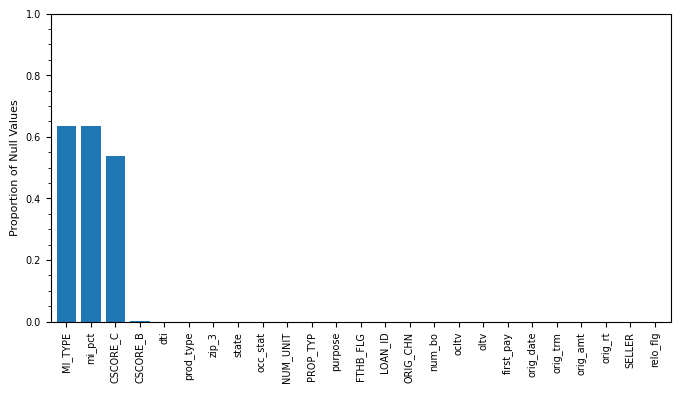

In [7]:
ax = df.isnull().sum().divide(len(df)).sort_values(ascending=False).plot.bar(width=0.8, figsize=(8, 4), fontsize=7)

ax.set_ylim(0, 1)

ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_tick_params(which='minor', bottom=True)

ax.set_ylabel('Proportion of Null Values', fontsize=8);

In [8]:
print(f"""
    Number rows: {df.shape[0]}
    Number columns: {df.shape[1]}
    Number null columns: {((df.isnull().sum()/len(df)) == 1).sum()}
""")


    Number rows: 266728
    Number columns: 25
    Number null columns: 0



In [9]:
# Refer to the Single-Family Loan Performance Dataset and Credit Risk Transfer - Glossary and File Layout
df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'SELLER', 'orig_rt', 'orig_amt', 'orig_trm',
       'orig_date', 'first_pay', 'oltv', 'ocltv', 'num_bo', 'dti', 'CSCORE_B',
       'CSCORE_C', 'FTHB_FLG', 'purpose', 'PROP_TYP', 'NUM_UNIT', 'occ_stat',
       'state', 'zip_3', 'mi_pct', 'prod_type', 'MI_TYPE', 'relo_flg'],
      dtype='object')

In [10]:
# Prepare the Performance variables
performanceFile = lppub_base[[
    'LOAN_ID', 'ACT_PERIOD', 'SERVICER', 'CURR_RATE', 'CURRENT_UPB', 'LOAN_AGE', 'REM_MONTHS', 'ADJ_REM_MONTHS', 
    'MATR_DT', 'MSA', 'DLQ_STATUS', 'MOD_FLAG', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_PAID_INSTALLMENT_DATE', 
    'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 
    'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 
    'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS', 
    'NON_INTEREST_BEARING_UPB', 'PRINCIPAL_FORGIVENESS_AMOUNT', 'repch_flag', 'LAST_UPB'
]].rename(columns={
    'ACT_PERIOD': 'period', 'SERVICER': 'servicer', 'CURR_RATE': 'curr_rte', 'CURRENT_UPB': 'act_upb', 
    'LOAN_AGE': 'loan_age', 'REM_MONTHS': 'rem_mths', 'ADJ_REM_MONTHS': 'adj_rem_months', 'MATR_DT': 'maturity_date', 
    'MSA': 'msa', 'DLQ_STATUS': 'dlq_status', 'MOD_FLAG': 'mod_ind', 'Zero_Bal_Code': 'z_zb_code', 
    'ZB_DTE': 'zb_date', 'LAST_PAID_INSTALLMENT_DATE': 'lpi_dte', 'FORECLOSURE_DATE': 'fcc_dte', 
    'DISPOSITION_DATE': 'disp_dte', 'FORECLOSURE_COSTS': 'FCC_COST', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS': 'PP_COST', 
    'ASSET_RECOVERY_COSTS': 'AR_COST', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS': 'IE_COST', 
    'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY': 'TAX_COST', 'NET_SALES_PROCEEDS': 'NS_PROCS', 
    'CREDIT_ENHANCEMENT_PROCEEDS': 'CE_PROCS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS': 'RMW_PROCS', 
    'OTHER_FORECLOSURE_PROCEEDS': 'O_PROCS', 'NON_INTEREST_BEARING_UPB': 'non_int_upb', 
    'PRINCIPAL_FORGIVENESS_AMOUNT': 'prin_forg_upb', 'LAST_UPB': 'zb_upb'
})

# Remove the original base DataFrame to save memory
#del lppub_base

# Create AQSN_DTE field from filename
acquisition_year = file_name[:4]
acquisition_qtr = file_name[4:6]

performanceFile['period'] = pd.to_datetime(performanceFile['period'])
performanceFile['servicer'] = performanceFile['servicer'].astype(str)
performanceFile['z_zb_code'] = performanceFile['z_zb_code'].astype(str)

# performanceFile['maturity_date'] = performanceFile['maturity_date'].astype(str)
# performanceFile['zb_date'] = performanceFile['zb_date'].astype(str)
# performanceFile['lpi_dte'] = performanceFile['lpi_dte'].astype(str)
# performanceFile['fcc_dte'] = performanceFile['fcc_dte'].astype(str)
# performanceFile['disp_dte'] = performanceFile['disp_dte'].astype(str)

if acquisition_qtr == 'Q1':
    acquisition_month = '03'
elif acquisition_qtr == 'Q2':
    acquisition_month = '06'
elif acquisition_qtr == 'Q3':
    acquisition_month = '09'
else:
    acquisition_month = '12'

acquisition_date = f"{acquisition_year}-{acquisition_month}-01"

# Convert all date fields to YYYY-MM-DD format
acquisitionFile = acquisitionFile.rename(columns={
    'orig_date': 'ORIG_DTE',
    'first_pay': 'FRST_DTE'
})

acquisitionFile['FRST_DTE'] = pd.to_datetime(acquisitionFile['FRST_DTE'])


performanceFile['maturity_date'] = np.where(performanceFile['maturity_date'] != '', 
                                            pd.to_datetime(performanceFile['maturity_date'].str[2:6] + '-' + performanceFile['maturity_date'].str[0:2] + '-01', errors='coerce'), 
                                            performanceFile['maturity_date'])

performanceFile['zb_date'] = np.where(performanceFile['zb_date'] != '', 
                                      pd.to_datetime(performanceFile['zb_date'].str[2:6] + '-' + performanceFile['zb_date'].str[0:2] + '-01', errors='coerce'), 
                                      performanceFile['zb_date'])

performanceFile['lpi_dte'] = np.where(performanceFile['lpi_dte'] != '', 
                                      pd.to_datetime(performanceFile['lpi_dte'].str[2:6] + '-' + performanceFile['lpi_dte'].str[0:2] + '-01', errors='coerce'), 
                                      performanceFile['lpi_dte'])

performanceFile['fcc_dte'] = np.where(performanceFile['fcc_dte'] != '', 
                                      pd.to_datetime(performanceFile['fcc_dte'].str[2:6] + '-' + performanceFile['fcc_dte'].str[0:2] + '-01', errors='coerce'), 
                                      performanceFile['fcc_dte'])

performanceFile['disp_dte'] = np.where(performanceFile['disp_dte'] != '', 
                                       pd.to_datetime(performanceFile['disp_dte'].str[2:6] + '-' + performanceFile['disp_dte'].str[0:2] + '-01', errors='coerce'), 
                                       performanceFile['disp_dte'])

In [11]:
# Create the acquisition_date variable based on your previous logic
# acquisition_date was generated earlier
# Assuming acquisition_date is already defined in the previous step.

# Create the first base table with a copy of acquisition fields plus AQSN_DTE field and recodes of MI_TYPE and OCLTV
baseTable1 = acquisitionFile.copy()

# Add AQSN_DTE field and recode MI_TYPE
baseTable1['AQSN_DTE'] = acquisition_date

# Recode MI_TYPE to be more descriptive
baseTable1['MI_TYPE'] = baseTable1['MI_TYPE'].replace({
    '1': 'BPMI',  # Borrower Paid Mortgage Insurance
    '2': 'LPMI',  # Lender Paid Mortgage Insurance
    '3': 'IPMI'   # Investor Paid Mortgage Insurance
}).fillna('None')

# If OCLTV is missing, replace it with OLTV
baseTable1['ocltv'] = np.where(baseTable1['ocltv'].isna(), baseTable1['oltv'], baseTable1['ocltv'])

In [12]:
len(baseTable1)
print("Number of missing servicers ", performanceFile['servicer'].isna().sum())

Number of missing servicers  0


In [13]:
# Create the second base table with the latest-available or aggregated data from the Performance fields

# LAST_ACTIVITY_DATE table: Get the latest activity date for each loan
last_act_dte_table = performanceFile.groupby('LOAN_ID').agg(LAST_ACTIVITY_DATE=('period', 'max')).reset_index()

# LAST_UPB table: Get the latest UPB for each loan, replacing with zb_upb if not missing
last_upb_table = (performanceFile.groupby('LOAN_ID')
                  .apply(lambda x: x.loc[x['period'].idxmax()])
                  .assign(LAST_UPB=lambda x: np.where(pd.notna(x['zb_upb']), x['zb_upb'], x['act_upb']))
                  [['LOAN_ID', 'LAST_UPB']]
                  .reset_index(drop=True))

# LAST_RT table: Get the latest interest rate for each loan
last_rt_table = (performanceFile[performanceFile['curr_rte'].notna()]
                 .groupby('LOAN_ID').agg(LAST_RT_DATE=('period', 'max')).reset_index()
                 .merge(performanceFile, how='left', left_on=['LOAN_ID', 'LAST_RT_DATE'], right_on=['LOAN_ID', 'period'])
                 [['LOAN_ID', 'curr_rte']]
                 .rename(columns={'curr_rte': 'LAST_RT'})
                 .assign(LAST_RT=lambda x: x['LAST_RT'].round(3)))

# zb_code_table: Get the zero-balance code for each loan
zb_code_table = (performanceFile[performanceFile['z_zb_code'] != 'nan']
                 .groupby('LOAN_ID').agg(zb_code_dt=('period', 'max')).reset_index()
                 .merge(performanceFile, how='left', left_on=['LOAN_ID', 'zb_code_dt'], right_on=['LOAN_ID', 'period'])
                 [['LOAN_ID', 'z_zb_code']]
                 .rename(columns={'z_zb_code': 'zb_code'}))

# Merge the tables together
max_table = (last_act_dte_table
             .merge(performanceFile, how='left', left_on=['LOAN_ID', 'LAST_ACTIVITY_DATE'], right_on=['LOAN_ID', 'period'])
             .merge(last_upb_table, how='left', on='LOAN_ID')
             .merge(last_rt_table, how='left', on='LOAN_ID')
             .merge(zb_code_table, how='left', on='LOAN_ID'))

# Remove intermediate tables to save memory
del last_act_dte_table, last_rt_table, last_upb_table, zb_code_table

# servicer_table: Get the latest servicer for each loan
servicer_table = (performanceFile[performanceFile['servicer'] != 'nan']
                  .groupby('LOAN_ID').agg(servicer_period=('period', 'max')).reset_index()
                  .merge(performanceFile, how='left', left_on=['LOAN_ID', 'servicer_period'], right_on=['LOAN_ID', 'period'])
                  .assign(SERVICER=lambda x: x['servicer'])
                  [['LOAN_ID', 'SERVICER']])

# non_int_upb_table: Get the second-to-last non-interest UPB for each loan
non_int_upb_table = (performanceFile.groupby('LOAN_ID')
                     .apply(lambda x: x.iloc[-2] if len(x) > 1 else x.iloc[-1])
                     .reset_index(drop=True)[['LOAN_ID', 'non_int_upb']]
                     .rename(columns={'non_int_upb': 'NON_INT_UPB'})
                     .assign(NON_INT_UPB=lambda x: np.where(x['NON_INT_UPB'].isna(), 0, x['NON_INT_UPB'])))

# Merge all the tables into baseTable2
baseTable2 = (baseTable1
              .merge(max_table, how='left', on='LOAN_ID')
              .merge(servicer_table, how='left', on='LOAN_ID')
              .merge(non_int_upb_table, how='left', on='LOAN_ID'))

# Remove intermediate tables to save memory
del max_table, servicer_table, non_int_upb_table

In [14]:
len(baseTable2)

266728

fcc_table: This table is generated by filtering rows that have all three date columns (lpi_dte, fcc_dte, disp_dte) not missing, then grouping by LOAN_ID to get the maximum of each date.

slimPerformanceFile: This is a trimmed version of performanceFile with selected columns. dlq_status is converted to numeric, replacing 'XX' with '999'.

First Delinquency Occurrence Tables (F30, F60, F90, F120, F180): These tables track the first occurrence of loans becoming delinquent at 30, 60, 90, 120, and 180 days. Grouping and filtering logic is similar to the original R code.

Loan Modification Tables (fmod_table): Identifies the first modification date for each loan and retrieves UPB values.

Computing NUM_PERIODS_120: This field is calculated by comparing the first delinquency date (F120_DTE) to the origination date (FRST_DTE).

Term Change (MODTRM_CHNG) and UPB Change (MODUPB_CHNG) Fields: These fields track changes in loan terms and balances due to modifications.

In [15]:
# Create the third base table with the latest-available foreclosure/disposition data
fcc_table = performanceFile.dropna(subset=['lpi_dte', 'fcc_dte', 'disp_dte'])

fcc_table = (fcc_table.groupby('LOAN_ID')
             .agg(LPI_DTE=('lpi_dte', 'max'), FCC_DTE=('fcc_dte', 'max'), DISP_DTE=('disp_dte', 'max'))
             .reset_index())

baseTable3 = baseTable2.merge(fcc_table, how='left', on='LOAN_ID')

# Remove intermediate tables to save memory
del fcc_table #, baseTable2

# Create the series of "first DQ occurrence" tables and loan modification tables
slimPerformanceFile = (performanceFile[['LOAN_ID', 'period', 'dlq_status', 'z_zb_code', 'act_upb', 'zb_upb', 'mod_ind', 'maturity_date', 'rem_mths']]
                       .copy())

slimPerformanceFile['dlq_status'] = slimPerformanceFile['dlq_status'].replace('XX', '999').astype(int)

# F30 table
f30_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 1) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
             .groupby('LOAN_ID').agg(F30_DTE=('period', 'min')).reset_index()
             .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F30_DTE'], right_on=['LOAN_ID', 'period'])
             [['LOAN_ID', 'F30_DTE', 'act_upb']]
             .rename(columns={'act_upb': 'F30_UPB'}))

# F60 table
f60_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 2) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
             .groupby('LOAN_ID').agg(F60_DTE=('period', 'min')).reset_index()
             .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F60_DTE'], right_on=['LOAN_ID', 'period'])
             [['LOAN_ID', 'F60_DTE', 'act_upb']]
             .rename(columns={'act_upb': 'F60_UPB'}))

# F90 table
f90_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 3) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
             .groupby('LOAN_ID').agg(F90_DTE=('period', 'min')).reset_index()
             .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F90_DTE'], right_on=['LOAN_ID', 'period'])
             [['LOAN_ID', 'F90_DTE', 'act_upb']]
             .rename(columns={'act_upb': 'F90_UPB'}))

# F120 table
f120_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 4) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
              .groupby('LOAN_ID').agg(F120_DTE=('period', 'min')).reset_index()
              .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F120_DTE'], right_on=['LOAN_ID', 'period'])
              [['LOAN_ID', 'F120_DTE', 'act_upb']]
              .rename(columns={'act_upb': 'F120_UPB'}))

# F180 table
f180_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 6) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
              .groupby('LOAN_ID').agg(F180_DTE=('period', 'min')).reset_index()
              .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F180_DTE'], right_on=['LOAN_ID', 'period'])
              [['LOAN_ID', 'F180_DTE', 'act_upb']]
              .rename(columns={'act_upb': 'F180_UPB'}))

# FCE table
fce_table = (slimPerformanceFile[((slimPerformanceFile['z_zb_code'].isin(['02', '03', '09', '15'])) | (slimPerformanceFile['dlq_status'] >= 6)) & (slimPerformanceFile['dlq_status'] < 999)]
             .groupby('LOAN_ID').agg(FCE_DTE=('period', 'min')).reset_index()
             .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'FCE_DTE'], right_on=['LOAN_ID', 'period'])
             [['LOAN_ID', 'FCE_DTE', 'act_upb', 'zb_upb']]
             .assign(FCE_UPB=lambda x: x['zb_upb'] + x['act_upb'])
             [['LOAN_ID', 'FCE_DTE', 'FCE_UPB']])

# FMOD table logic fix

# Ensure 'period' and 'FMOD_DTE' are strings before extracting year and month

fmod_dte_table = (slimPerformanceFile[(slimPerformanceFile['mod_ind'] == 'Y') & (slimPerformanceFile['z_zb_code'] == 'nan')]
                  .groupby('LOAN_ID').agg(FMOD_DTE=('period', 'min')).reset_index())

# Convert 'period' and 'FMOD_DTE' to year and month integers
slimPerformanceFile['period_year'] = slimPerformanceFile['period'].dt.year
slimPerformanceFile['period_month'] = slimPerformanceFile['period'].dt.month

fmod_dte_table['FMOD_DTE_year'] = fmod_dte_table['FMOD_DTE'].dt.year
fmod_dte_table['FMOD_DTE_month'] = fmod_dte_table['FMOD_DTE'].dt.month

# Merge slimPerformanceFile with fmod_dte_table
fmod_table = (slimPerformanceFile[(slimPerformanceFile['mod_ind'] == 'Y') & (slimPerformanceFile['z_zb_code'] == 'nan')]
              .merge(fmod_dte_table, how='left', on='LOAN_ID'))

# Create a new column to calculate the difference in months
fmod_table['period_total_months'] = fmod_table['period_year'] * 12 + fmod_table['period_month']
fmod_table['FMOD_DTE_total_months'] = fmod_table['FMOD_DTE_year'] * 12 + fmod_table['FMOD_DTE_month']

# Apply the filter for 3 months window
fmod_table = fmod_table[fmod_table['period_total_months'] <= fmod_table['FMOD_DTE_total_months'] + 3]

# Group by 'LOAN_ID' and get the max UPB
fmod_table = (fmod_table.groupby('LOAN_ID')
              .agg(FMOD_UPB=('act_upb', 'max'))
              .reset_index())

# Merge the rest of the necessary columns
fmod_table = (fmod_table.merge(fmod_dte_table, how='left', on='LOAN_ID')
              .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'FMOD_DTE'], right_on=['LOAN_ID', 'period'])
              [['LOAN_ID', 'FMOD_DTE', 'FMOD_UPB', 'maturity_date']])
# Remove intermediate FMOD date table
# del fmod_dte_table

# Ensure 'F120_DTE' and 'FRST_DTE' are strings before extracting year and month
f120_table['F120_DTE'] = f120_table['F120_DTE']
acquisitionFile['FRST_DTE'] = acquisitionFile['FRST_DTE']

# Compute NUM_PERIODS_120 field
num_120_table = (f120_table.merge(acquisitionFile, how='left', on='LOAN_ID')
                 .assign(z_num_periods_120=lambda x: (((x['F120_DTE'].dt.year * 12 + x['F120_DTE'].dt.month) -
                                                        (x['FRST_DTE'].dt.year * 12 + x['FRST_DTE'].dt.month) + 1)))
                 [['LOAN_ID', 'z_num_periods_120']])

# del acquisitionFile

# Compute MODTRM_CHNG field
orig_maturity_table = (slimPerformanceFile.dropna(subset=['maturity_date'])
                       .groupby('LOAN_ID').agg(maturity_date_period=('period', 'min')).reset_index()
                       .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'maturity_date_period'], right_on=['LOAN_ID', 'period'])
                       [['LOAN_ID', 'maturity_date']]
                       .rename(columns={'maturity_date': 'orig_maturity_date'}))


trm_chng_table = (slimPerformanceFile.groupby('LOAN_ID')
                  .apply(lambda x: x.assign(prev_rem_mths=x['rem_mths'].shift(1)))
                  .assign(trm_chng=lambda x: x['rem_mths'] - x['prev_rem_mths'],
                          did_trm_chng=lambda x: np.where(x['trm_chng'].fillna(-1) >= 0, 1, 0)) # fill the induced na with -1
                  .query('did_trm_chng == 1')
                  .groupby('LOAN_ID').agg(trm_chng_dt=('period', 'min')).reset_index())

modtrm_table = (fmod_table.merge(orig_maturity_table, how='left', on='LOAN_ID')
                .merge(trm_chng_table, how='left', on='LOAN_ID')
                .assign(MODTRM_CHNG=lambda x: np.where((x['maturity_date'] != x['orig_maturity_date']) | x['trm_chng_dt'].notna(), 1, 0))
                [['LOAN_ID', 'MODTRM_CHNG']])

# del orig_maturity_table, trm_chng_table

# Compute MODTRM_UPB field
pre_mod_upb_table = (slimPerformanceFile.merge(fmod_table, how='left', on='LOAN_ID')
                     .query('period < FMOD_DTE')
                     .groupby('LOAN_ID').agg(pre_mod_period=('period', 'max')).reset_index()
                     .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'pre_mod_period'], right_on=['LOAN_ID', 'period'])
                     [['LOAN_ID', 'act_upb']]
                     .rename(columns={'act_upb': 'pre_mod_upb'}))

# del slimPerformanceFile

modupb_table = (fmod_table.merge(pre_mod_upb_table, how='left', on='LOAN_ID')
                .assign(MODUPB_CHNG=lambda x: np.where(x['FMOD_UPB'] >= x['pre_mod_upb'], 1, 0))
                [['LOAN_ID', 'MODUPB_CHNG']])

# del pre_mod_upb_table

In [16]:

slimPerformanceFile['mod_ind'].unique()

array(['N', nan, 'Y'], dtype=object)

Explanation:

Merge Tables: In pandas, merge() is used to join tables by LOAN_ID. We use how='left' to perform left joins, similar to how it's done in R's left_join().

Conditional Updates: The .assign() method in pandas allows for column-wise assignment. np.where() is used to conditionally assign values to the UPB columns (F30_UPB, F60_UPB, etc.). The condition checks if the UPB value is missing (isna()) but the corresponding date (F30_DTE, etc.) is not missing, and if so, it replaces the UPB value with orig_amt.

Removing Intermediate Tables: Similar to R's rm(), del is used in Python to remove the intermediate tables to free up memory.

In [17]:
# Create the fourth base table by joining the first-DQ-occurrence and loan modification tables
baseTable4 = (baseTable3
              .merge(f30_table, how='left', on='LOAN_ID')
              .merge(f60_table, how='left', on='LOAN_ID')
              .merge(f90_table, how='left', on='LOAN_ID')
              .merge(f120_table, how='left', on='LOAN_ID')
              .merge(f180_table, how='left', on='LOAN_ID')
              .merge(fce_table, how='left', on='LOAN_ID')
              .merge(fmod_table, how='left', on='LOAN_ID')
              .merge(num_120_table, how='left', on='LOAN_ID')
              .merge(modtrm_table, how='left', on='LOAN_ID')
              .merge(modupb_table, how='left', on='LOAN_ID')
              .assign(
                  F30_UPB=lambda x: np.where(x['F30_UPB'].isna() & x['F30_DTE'].notna(), x['orig_amt'], x['F30_UPB']),
                  F60_UPB=lambda x: np.where(x['F60_UPB'].isna() & x['F60_DTE'].notna(), x['orig_amt'], x['F60_UPB']),
                  F90_UPB=lambda x: np.where(x['F90_UPB'].isna() & x['F90_DTE'].notna(), x['orig_amt'], x['F90_UPB']),
                  F120_UPB=lambda x: np.where(x['F120_UPB'].isna() & x['F120_DTE'].notna(), x['orig_amt'], x['F120_UPB']),
                  F180_UPB=lambda x: np.where(x['F180_UPB'].isna() & x['F180_DTE'].notna(), x['orig_amt'], x['F180_UPB']),
                  FCE_UPB=lambda x: np.where(x['FCE_UPB'].isna() & x['FCE_DTE'].notna(), x['orig_amt'], x['FCE_UPB'])
              ))

# Remove intermediate tables to save memory
#del baseTable3, f30_table, f60_table, f90_table, f120_table, f180_table, fce_table, fmod_table, num_120_table, modtrm_table, modupb_table


In [18]:
# First assignment without PFG_COST
baseTable4['disp_dte'] = baseTable4['disp_dte'].fillna(value=np.nan) 
baseTable4['disp_dte'] = pd.to_datetime(baseTable4['disp_dte'], errors='coerce')
baseTable4['LPI_DTE'] = pd.to_datetime(baseTable4['LPI_DTE'], errors='coerce')


baseTable5 = (baseTable4
              .assign(
                  LAST_DTE=lambda x: np.where(~np.isnan(x['disp_dte']) , x['disp_dte'], x['LAST_ACTIVITY_DATE']),
                  repch_flag=lambda x: np.where(x['repch_flag'] == 'Y', 1, 0),
                  PFG_COST=lambda x: x['prin_forg_upb'],
                  MOD_FLAG=lambda x: np.where(x['FMOD_DTE'].notna(), 1, 0),
                  MODFG_COST=lambda x: np.where(x['mod_ind'] == 'Y', 0, np.nan),
                  MODTRM_CHNG=lambda x: x['MODTRM_CHNG'].fillna(0),
                  MODUPB_CHNG=lambda x: x['MODUPB_CHNG'].fillna(0),
                  CSCORE_MN=lambda x: np.where(x['CSCORE_C'].notna() & x['CSCORE_B'].notna() & (x['CSCORE_C'] < x['CSCORE_B']), x['CSCORE_C'], x['CSCORE_B']),
                  ORIG_VAL=lambda x: round(x['orig_amt'] / (x['oltv'] / 100), 2),
                  dlq_status=lambda x: np.where(x['dlq_status'].isin(['X', 'XX']), '999', x['dlq_status']),
                  z_last_status=lambda x: x['dlq_status'].astype(float),
                  LAST_STAT=lambda x: np.select(
                      [
                          x['zb_code'] == '09', x['zb_code'] == '03', x['zb_code'] == '02', 
                          x['zb_code'] == '06', x['zb_code'] == '15', x['zb_code'] == '16', 
                          x['zb_code'] == '01', (x['z_last_status'] < 999) & (x['z_last_status'] >= 9), 
                          x['z_last_status'] == 8, x['z_last_status'] == 7, x['z_last_status'] == 6,
                          x['z_last_status'] == 5, x['z_last_status'] == 4, x['z_last_status'] == 3,
                          x['z_last_status'] == 2, x['z_last_status'] == 1, x['z_last_status'] == 0
                      ],
                      ['F', 'S', 'T', 'R', 'N', 'L', 'P', '9', '8', '7', '6', '5', '4', '3', '2', '1', 'C'],
                      default='X'
                  ),
                  FCC_DTE=lambda x: np.where(pd.isna(x['FCC_DTE']) & (x['LAST_STAT'].isin(['F', 'S', 'N', 'T'])), x['zb_date'], x['FCC_DTE']),
                  COMPLT_FLG=lambda x: np.where(~pd.isna(x['DISP_DTE']), 1, np.nan),
                  INT_COST=lambda x: np.where(
                      (x['COMPLT_FLG'] == 1) & (~pd.isna(x['LPI_DTE'])),
                      round(((x['LAST_DTE'].dt.year * 12 + x['LAST_DTE'].dt.month) -
                             (x['LPI_DTE'].dt.year * 12 + x['LPI_DTE'].dt.month)) *
                            ((x['LAST_RT'] / 100) - 0.0035) / 12 * (x['LAST_UPB'] + (-1 * x['NON_INT_UPB'])), 2),
                      np.nan
                  ),
                  FCC_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['FCC_COST'].isna(), 0, x['FCC_COST']),
                  PP_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['PP_COST'].isna(), 0, x['PP_COST']),
                  AR_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['AR_COST'].isna(), 0, x['AR_COST']),
                  IE_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['IE_COST'].isna(), 0, x['IE_COST']),
                  TAX_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['TAX_COST'].isna(), 0, x['TAX_COST'])
              ))

baseTable5 = (baseTable5
              .assign(INT_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['INT_COST'].isna(), 0, x['INT_COST'])))

# Second assignment focusing on PFG_COST
baseTable5 = (baseTable5
              .assign(
                  CSCORE_MN=lambda x: np.where(x['CSCORE_MN'].isna(), x['CSCORE_B'], x['CSCORE_MN']),
                  MODFG_COST=lambda x: np.where((x['mod_ind'] == 'Y') & (x['PFG_COST'] > 0), x['PFG_COST'], 0),
                  PFG_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['PFG_COST'].isna(), 0, x['PFG_COST']),
                  COMPLT_FLG=lambda x: np.where(~x['LAST_STAT'].isin(['F', 'S', 'N', 'T']), np.nan, x['COMPLT_FLG']),
                  CE_PROCS=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['CE_PROCS'].isna(), 0, x['CE_PROCS']),
                  NS_PROCS=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['NS_PROCS'].isna(), 0, x['NS_PROCS']),
                  RMW_PROCS=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['RMW_PROCS'].isna(), 0, x['RMW_PROCS']),
                  O_PROCS=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['O_PROCS'].isna(), 0, x['O_PROCS']),
                  NET_LOSS=lambda x: np.round(np.where(
                      x['COMPLT_FLG'] == 1,
                      (x['LAST_UPB'] + x['FCC_COST'] + x['PP_COST'] + x['AR_COST'] + x['IE_COST'] +
                       x['TAX_COST'] + x['PFG_COST'] + x['INT_COST'] + -1 * x['NS_PROCS'] + -1 * x['CE_PROCS'] +
                       -1 * x['RMW_PROCS'] + -1 * x['O_PROCS']), np.nan), 2),
                  NET_SEV=lambda x: np.round(np.where(x['COMPLT_FLG'] == 1, x['NET_LOSS'] / x['LAST_UPB'], np.nan), 6)
              ))

baseTable5 = (baseTable5
              .assign(CSCORE_MN=lambda x: np.where(x['CSCORE_MN'].isna(), x['CSCORE_C'], x['CSCORE_MN'])))

# Remove baseTable4 to free memory
del baseTable4

In [19]:
# Assuming baseTable1 and performanceFile are already loaded DataFrames

# Compute MODIR_COST, MODFB_COST and other loan modification fields
modir_table = (baseTable1
               .merge(performanceFile, on='LOAN_ID', how='left')
               .query("mod_ind == 'Y'")
               .assign(
                   non_int_upb=lambda x: np.where(x['non_int_upb'].isna(), 0, x['non_int_upb']),
                   modir_cost=lambda x: np.round(np.where(x['mod_ind'] == 'Y', ((x['orig_rt'] - x['curr_rte']) / 1200) * x['act_upb'], 0), 2),
                   modfb_cost=lambda x: np.round(np.where((x['mod_ind'] == 'Y') & (x['non_int_upb'] > 0), (x['curr_rte'] / 1200) * x['non_int_upb'], 0), 2)
               )
               .groupby('LOAN_ID', as_index=False)
               .agg(
                   MODIR_COST=('modir_cost', 'sum'),
                   MODFB_COST=('modfb_cost', 'sum')
               )
               .assign(
                   MODTOT_COST=lambda x: round(x['MODFB_COST'] + x['MODIR_COST'], 2)
               ))
# Remove the performanceFile if no longer needed
del performanceFile

In [20]:
# Join baseTable5 with modir_table

baseTable5['zb_date'] = pd.to_datetime(baseTable5['zb_date'], errors='coerce')

baseTable6 = (baseTable5
              .merge(modir_table, on='LOAN_ID', how='left')
              .assign(
                  COMPLT_FLG=lambda x: x['COMPLT_FLG'].astype(str)
              ))

baseTable6 = (baseTable6
              .merge(modir_table, on='LOAN_ID', how='left')
              .assign(
                  COMPLT_FLG=lambda x: np.where(pd.isna(x['COMPLT_FLG']), '', x['COMPLT_FLG'])
              ))

baseTable6 = (baseTable6
              .merge(modir_table, on='LOAN_ID', how='left')
              .assign(
                  non_int_upb=lambda x: np.where((x['COMPLT_FLG'] == '1') & (pd.isna(x['non_int_upb'])), 0, x['non_int_upb']),
                  MODIR_COST=lambda x: np.round(np.where(
                      x['COMPLT_FLG'] == '1', 
                      x['MODIR_COST'] +  (((x['LAST_DTE'].dt.year * 12 + x['LAST_DTE'].dt.month) - (x['zb_date'].dt.year * 12 + x['zb_date'].dt.month)) *
                                         (x['orig_rt'] - x['LAST_RT']) / 1200) * x['LAST_UPB'], 
                      x['MODIR_COST']
                  ), 2),
                  MODFB_COST=lambda x: np.round(np.where(
                      x['COMPLT_FLG'] == '1',
                      x['MODFB_COST'] + (((x['LAST_DTE'].dt.year * 12 + x['LAST_DTE'].dt.month) - (x['zb_date'].dt.year * 12 + x['zb_date'].dt.month)) * 
                                         (x['LAST_RT'])/ 1200) * x['non_int_upb'],
                      x['MODFB_COST']
                  ), 2),
                  COMPLT_FLG=lambda x: x['COMPLT_FLG'].astype(float),
                  orig_rt=lambda x: np.round(x['orig_rt'].astype(float), 3)
              ))

# Remove unused tables
del baseTable1, baseTable5, modir_table

# Select and reorder columns for baseTable7
baseTable7 = baseTable6[[
    'LOAN_ID', 'ORIG_CHN', 'SELLER', 'orig_rt', 'orig_amt', 'orig_trm', 'oltv', 'ocltv', 'num_bo', 'dti',
    'CSCORE_B', 'FTHB_FLG', 'purpose', 'PROP_TYP', 'NUM_UNIT', 'occ_stat', 'state', 'zip_3', 'mi_pct', 'CSCORE_C',
    'relo_flg', 'MI_TYPE', 'AQSN_DTE', 'ORIG_DTE', 'FRST_DTE', 'LAST_RT', 'LAST_UPB', 'msa', 'FCC_COST', 'PP_COST',
    'AR_COST', 'IE_COST', 'TAX_COST', 'NS_PROCS', 'CE_PROCS', 'RMW_PROCS', 'O_PROCS', 'repch_flag', 'LAST_ACTIVITY_DATE',
    'LPI_DTE', 'FCC_DTE', 'DISP_DTE', 'SERVICER', 'F30_DTE', 'F60_DTE', 'F90_DTE', 'F120_DTE', 'F180_DTE', 'FCE_DTE',
    'F180_UPB', 'FCE_UPB', 'F30_UPB', 'F60_UPB', 'F90_UPB', 'MOD_FLAG', 'FMOD_DTE', 'FMOD_UPB', 'MODIR_COST', 'MODFB_COST',
    'MODFG_COST', 'MODTRM_CHNG', 'MODUPB_CHNG', 'z_num_periods_120', 'F120_UPB', 'CSCORE_MN', 'ORIG_VAL', 'LAST_DTE',
    'LAST_STAT', 'COMPLT_FLG', 'INT_COST', 'PFG_COST', 'NET_LOSS', 'NET_SEV', 'MODTOT_COST'
]]

# Remove baseTable6
del baseTable6


In [21]:

# Export to CSV
file_name = f"{ file_year}{file_qtr}_stat.csv"
baseTable7.to_csv(file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)
